In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import *
import math

In [95]:
#loading data
train3 = pd.read_csv('new_train3.txt', sep=" ", header=None)
train5 = pd.read_csv('new_train5.txt', sep=" ", header=None)
train_data = pd.concat([train3, train5])
test3 = pd.read_csv('new_test3.txt', sep=" ", header=None)
test5 = pd.read_csv('new_test5.txt', sep=" ", header=None)
test_data = pd.concat([test3, test5])

In [96]:
# if y = 1 then the digit is 3, y = 0 then digit is 5
y3_train = np.ones((train3.shape[0],1))
y5_train = np.zeros((train5.shape[0],1))
y_train = np.concatenate((y3_train, y5_train), axis=0)
y3_test = np.ones((test3.shape[0],1))
y5_test = np.zeros((test5.shape[0],1))
y_test = np.concatenate((y3_test, y5_test), axis=0)

In [97]:
#define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [98]:
#using the gradient ascent method
def CalcGradient(weight, dataset, y):
    w_dot_x = dataset.values[:,:64].dot(weight)
    sig = sigmoid(w_dot_x)
    err_signal = y - sig
    gradient = err_signal.T.dot(dataset.values[:,:64])
    return gradient.T

In [99]:
def CalcLogLikelihood(weight, dataset, y):
    w_dot_x = dataset.values[:,:64].dot(weight)
    sig_p = sigmoid(w_dot_x)
    sig_n = sigmoid(-w_dot_x)
    log_sig_p = np.log(sig_p)
    log_sig_n = np.log(sig_n)
    likelihood = y.T.dot(log_sig_p) + (np.ones((y.shape[0],1)) - y).T.dot(log_sig_n)
    return likelihood[0,0]

In [100]:
def CalcPercentError(weight,dataset,y):
    prediction = np.round(sigmoid(dataset.values[:,:64].dot(weight)))
    error = np.sum(prediction != y)
    percent = error/y.shape[0]
    return percent

In [103]:
#initialize weight to all zeros
weight = np.zeros((64,1))
epoch = 20000
eta = 0.2/y_train.shape[0]
window = 100
l = np.zeros((int(epoch/window),1))
for i in range(epoch):
    weight += eta*CalcGradient(weight,train_data,y_train)
    likelihood = CalcLogLikelihood(weight, train_data, y_train)
    if i%window ==0:
        l[int(i/window),0] = likelihood
        
test_error = CalcPercentError(weight,test_data,y_test)
train_error = CalcPercentError(weight,train_data,y_train)
print('train error:  ', train_error)
print('test error:  ', test_error)

train error:   0.037142857142857144
test error:   0.0525


Text(0.5,1,'log likelihood vs epochs')

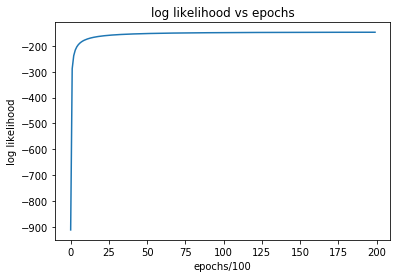

In [104]:
plt.plot(l)
plt.xlabel('epochs/100')
plt.ylabel('log likelihood')
plt.title('log likelihood vs epochs')

In [105]:
# 8 by 8 matrix of weight vector
weight.reshape(8,8)

array([[ 1.39851701,  1.45522758,  2.11710637,  0.96266395,  1.78019732,
         0.48591226, -0.88290695, -1.97837275],
       [-0.88468182, -0.00629864, -0.94380608,  0.62812088,  0.12908065,
        -0.60284023,  1.52691888, -0.01331243],
       [-2.87209376, -1.20465755, -1.03613088, -0.33901581, -0.27912158,
         2.20181178,  3.17165672,  3.71824293],
       [-2.3127257 , -0.73219418, -1.6965027 ,  0.57100694,  1.62921048,
         0.55401612, -0.42416942,  0.25230403],
       [-0.19781053, -0.25694259, -0.24186504,  0.95199046,  0.14368664,
         0.0954796 ,  0.72501751,  0.16087988],
       [-1.31249408,  0.98435695, -0.53215599, -0.7073318 , -0.44155929,
         0.7594612 , -0.02971906,  1.83425067],
       [-0.52937129,  0.30339596, -1.10553815, -0.88560519,  0.04087898,
         0.23271373, -0.56357482,  1.65999506],
       [-0.34382573, -0.3508762 ,  0.48453661, -4.72930119, -0.45345843,
        -0.47452466, -0.0177867 ,  0.64486077]])